In [1]:
from google.cloud import vision
from google.cloud import storage
from PIL import Image
import numpy as np
import os, sys
from helper import *
import csv  
from io import BytesIO
from IPython import display

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"../guppies-test-4c48569421d8.json"

### Read all files from the google bucket. Can cycle through the files in this list and write results to the csv file.

In [2]:
# Read all JPG files. All images are in both .jpg and .nef formats, need to avoid duplicates.
all_files = ListAvaliableFiles("guppy_images")
all_jpg_files = [ x for x in all_files if "JPG" in x ]

# Read the random number array we will use to assign images.
# random_array = np.arange(len(all_jpg_files))
# np.random.shuffle(random_array)
# np.save('../Data/radom_array.npy', random_array)
random_array = np.load('../Data/radom_array.npy')

# Assign images.
Jordan_array = random_array[0:500]
Sunny_array = random_array[500:1000]

Jordan_files = []
Sunny_files = []

for index in Jordan_array:
    Jordan_files.append(all_jpg_files[index])

for index in Sunny_array:
    Sunny_files.append(all_jpg_files[index])

KeyboardInterrupt: 

### Opens a file from the google bucket (or locally, depends if using RetreiveImage (cloud) or LoadImage (local)), crops it, reads it and corrects the output.

In [ ]:
"""Retreive cloud image"""
# file = all_jpg_files[50]
file= '1301/Lower Lalaja/28A/100NCD60/DSC_1728.JPG'
image = RetreiveImage(file, verbose=True)

"""Read local image"""
# file = '/Users/jordan/Desktop/Guppies/Data/raw/DSC_1053.JPG'
# image = LoadImage(file)

cropped_image = CroppedImage(image, verbose=True)
output_string, word_confidences = ReadImage(cropped_image, verbose=True)
label = FindErrors(output_string, verbose=True)
print("Initial label:", output_string,
      "\nCorrected label:", label)


Image has been read from google bucket.

Image has been cropped.

Output: MLL-150-01/28/13 
Confidence: 0.7101017336057419

Removing special characters from the output string (e.g. '.', '|').
characters ( have been replaced with 1
characters \ have been replaced with 1
characters ( have been replaced with 1
characters \ have been replaced with 1
characters ( have been replaced with 1
characters \ have been replaced with 1
Character M is fine.
Character L is fine.
Character L is fine.
Character - is fine.
Character 1 is fine.
Character 5 is fine.
Character 0 is fine.
Character - is fine.
Character 0 is fine.
Character 1 is fine.
Character / is fine.
Character 2 is fine.
Character 8 is fine.
Character / is fine.
Character 1 is fine.
Character 3 is fine.
String after preprocessing: ['MLL', '150', '01/28/13']

Correct number of paragraphs.

Looking for errors in the title (MLL).
Final title: MLL

Looking for errors in the identity (150).
Incorrect identity length. Identity has 3 elements,

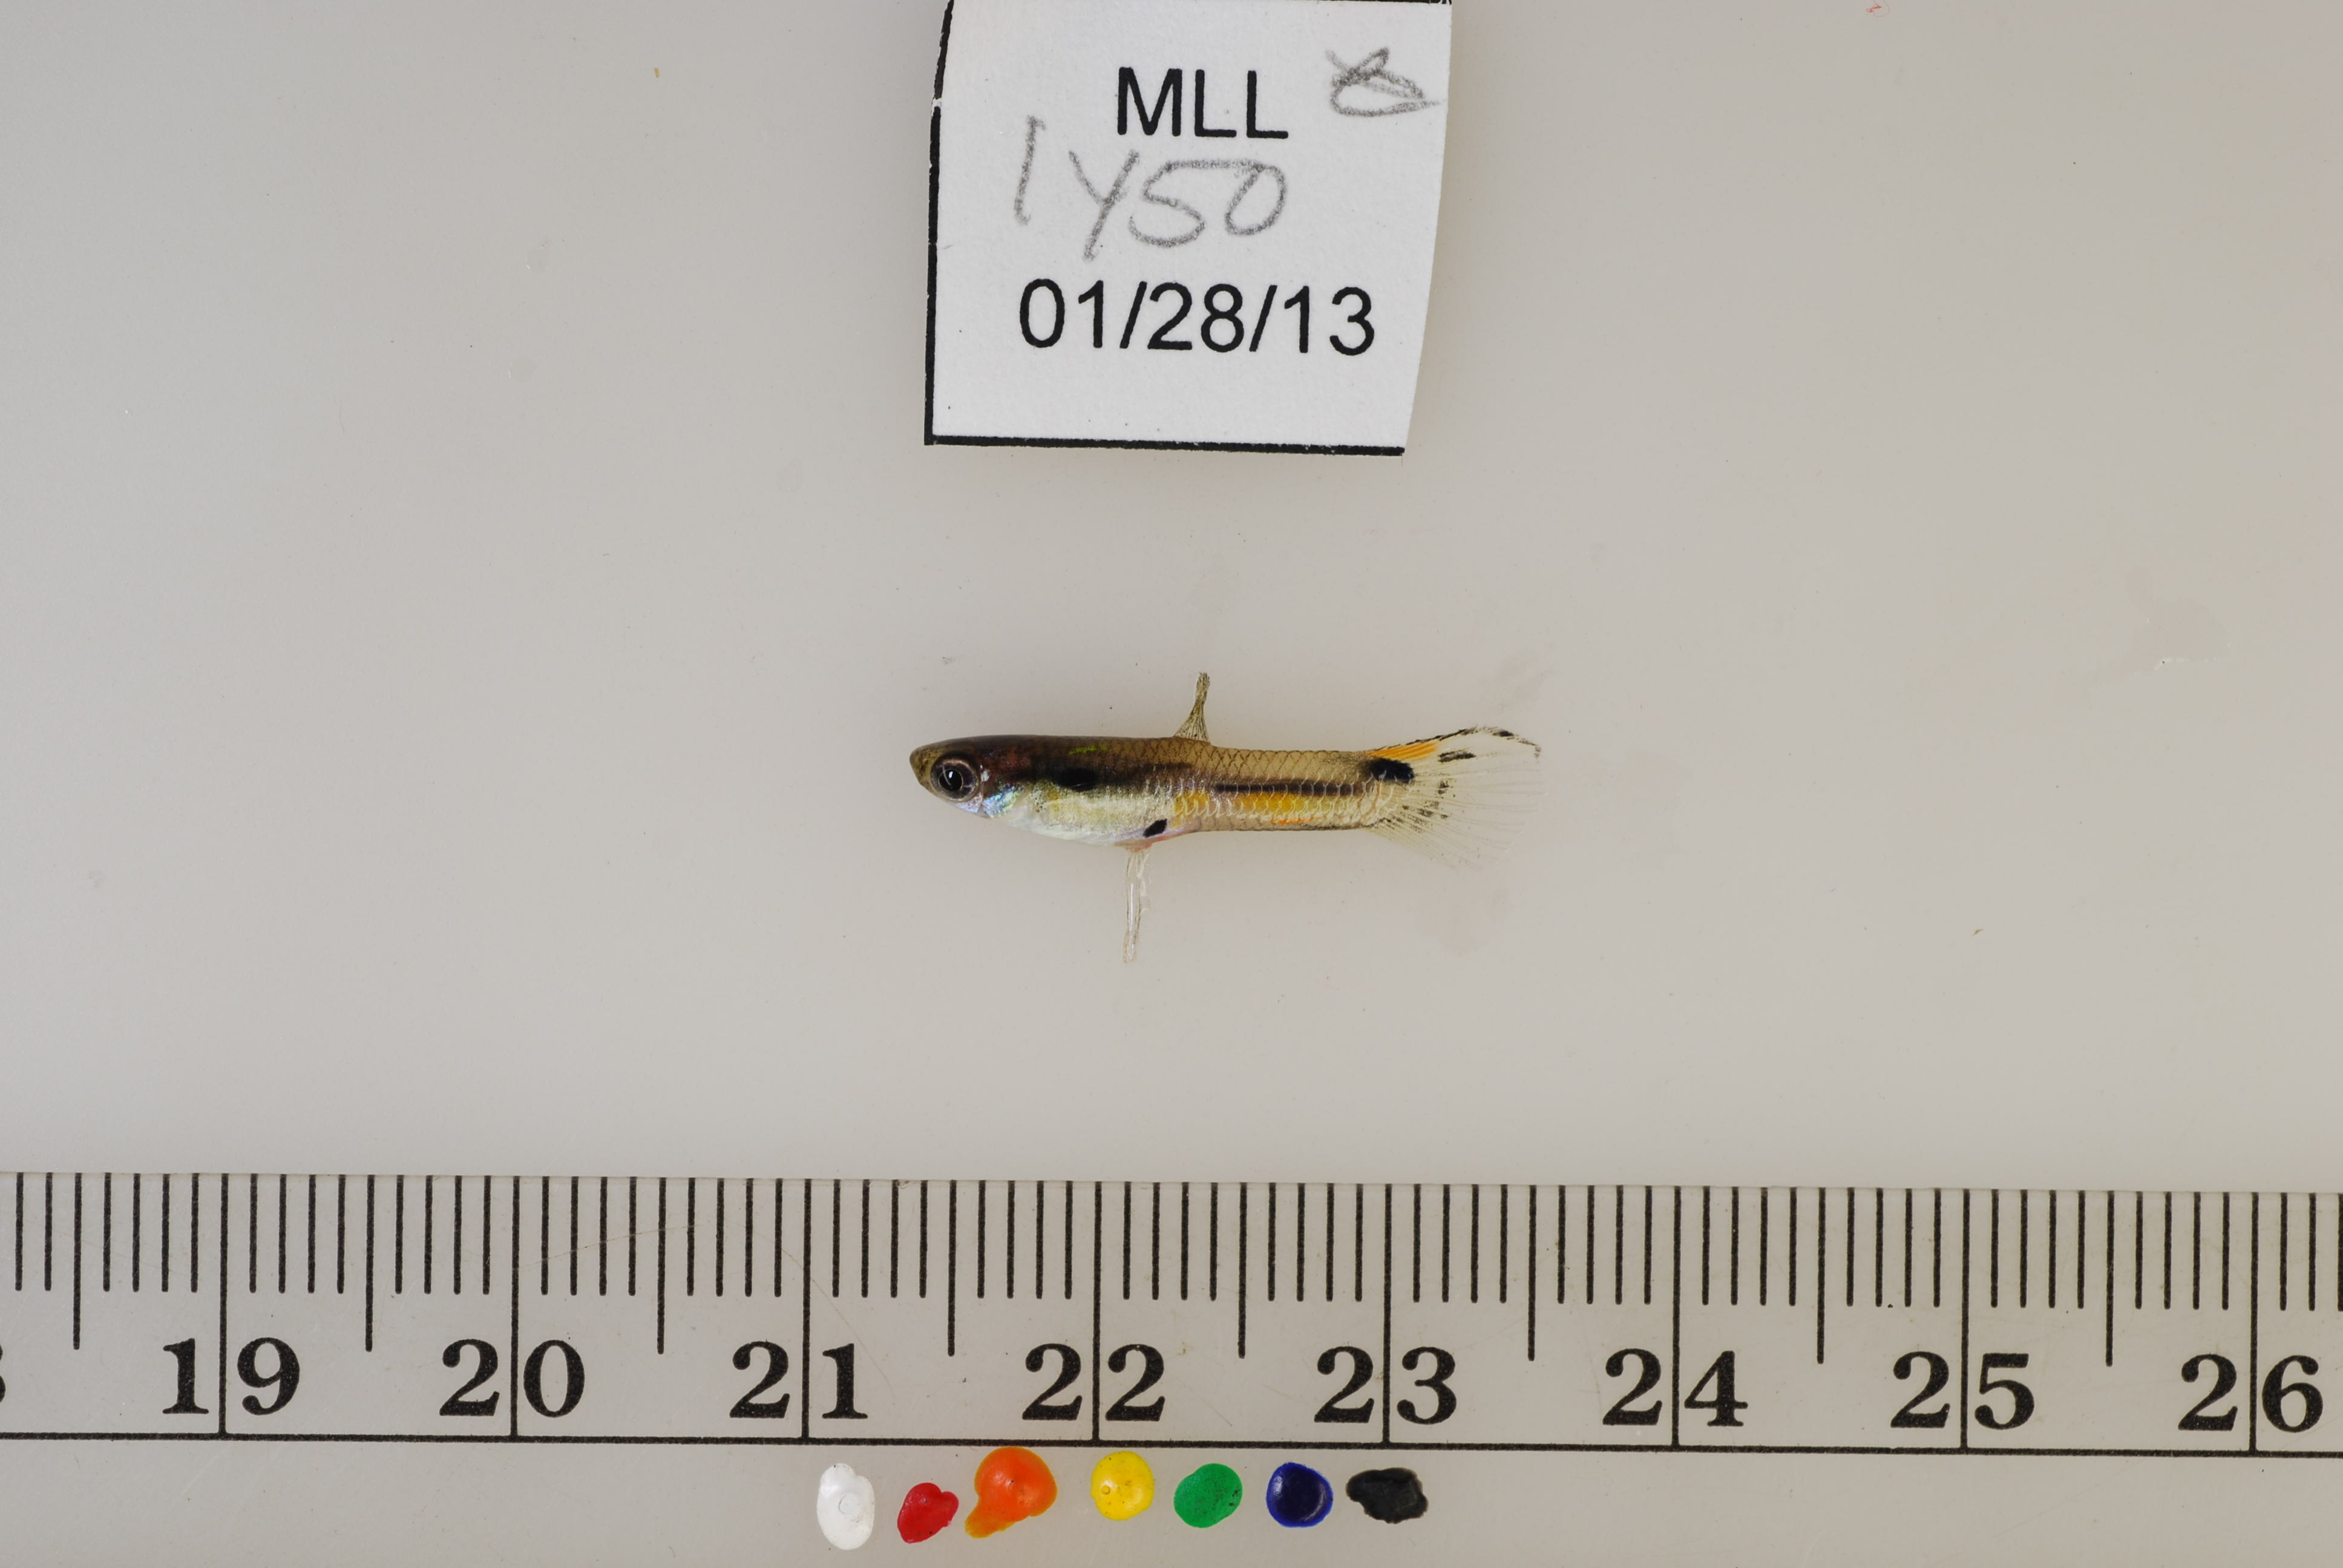

In [ ]:
Image.open(image)

### Write filename, initial prediction, corrected prediction and the manually inputted truth to the truth.csv file for a set of file names.
The files have been randomised and split.

In [ ]:
with open('../Data/truth.csv', 'a') as f:
    writer = csv.writer(f)

    for file in Sunny_files:
        # Read the data and predict the label.
        image = RetreiveImage(file, verbose=False)
        cropped_image = CroppedImage(image, verbose=False)

        display.display(Image.open(cropped_image))
        display.clear_output(wait=True)

        initial_prediction = ReadImage(cropped_image, verbose=False)[0]
        corrected_prediction = FindErrors(initial_prediction)
    
        # Provide truth
        truth = input("Truth:")

        writer.writerow([file, initial_prediction, corrected_prediction, truth])

### Read through all cloud files and write filename, initial prediction and corrected prediction to the predictions.csv file.

In [ ]:
files = all_jpg_files
with open('../Data/predictions.csv', 'w') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(['filename', 'prediction', 'corrected'])

    for i, file in enumerate(files):    
        print(f'{i+1}/{len(files)}',end='\r')

        # Read the data
        image = RetreiveImage(file, verbose=False)
        cropped_image = CroppedImage(image, verbose=False)
        Image.open(cropped_image)
        initial_prediction = ReadImage(cropped_image, verbose=False)[0]
        corrected_prediction = FindErrors(initial_prediction)
        
        # write the data
        writer.writerow([all_files[i], initial_prediction, corrected_prediction])

### Some code to reanalyse predictions once we have changed the algorithm

In [3]:
import csv

pred_file = 'Truth'

with open(f'../Data/{pred_file}_new.csv', 'w') as f_new:
    with open(f'../Data/{pred_file}.csv', 'r') as f:
        filereader = csv.reader(f)
        writer = csv.writer(f_new)
        for n, row in enumerate(filereader):
            if row != []:
                new_row = row[:2]

                new_prediction = FindErrors(row[1])

                new_row.append(new_prediction)
                new_row.append(row[3])

                writer.writerow(new_row)


now delete old file and rename new one.

### Some code to check the accuracy of the algorithm

In [20]:
import csv

correct_files = []
incorrect_files = []
invalid_files = []

with open(f'../Data/{pred_file}_new.csv', 'r') as f:
    filereader = csv.reader(f)
    for n, row in enumerate(filereader):
        if row != []:
            correct = int(row[3] == row[2])
            if correct:
                correct_files.append(row[0])

            if not correct:
                if row[2] == '1':
                    invalid_files.append(row[0])
                    print(n + 1, "Invalid")

                else: 
                    true = row[3].split('-')
                    pred = row[2].split('-')

                    incorrect_files.append(row[0])

                    if len(true) != 3 or len(pred) != 3:
                        print(n, 'error')
                        continue

                    for i in range(3):
                        if true[i] != pred[i]:
                            print(n + 1, true[i], pred[i])

print("\nNumber Correct:", len(correct_files), 
      "\nNumber Incorrect:", len(incorrect_files),
      "\nNumber Invalid:", len(invalid_files))

2 3F4F 3S4S
6 3P6W 3PLAW
7 3Y6G 3Y6G5
14 1O4K 1O4I
16 4O7Y 9O7Y
19 Invalid
21 2G5G 2G5G2
24 1K7K 1I7K
30 Invalid
33 Invalid
34 2W7V QW7V
37 1N8F 1N5F
44 1O5P 1O5G
50 2B8W 2B3W
51 7W8G 7I8G
58 4W5W 4W5WN
63 4N5O 4I5O
64 5P7K 4SPYK
66 2K8B 2K8B2I8
74 Invalid
77 4O7B 4O7F
86 5S7B 5B7P
96 6Y7P 6Y2P
97 6V7P 6V2P
98 1Y8R 1Y8P
99 Invalid
100 5K6O 5Y6O
101 2R6Y 2ROY
102 1F5F JF5G
104 1V2G7G 1S6Y6
105 5P7V 5F7V
110 3R7V 3R2V
111 3W7V NFMF
114 1F3O 1G3O
116 2B5G 2R5G
118 5R6W 5R8W
119 2R5R 2R1R
125 Invalid
140 1R8G 1R5C
142 2N4F 2N7F
150 7V8G 7O8G
154 4V8G 4I8G
156 Invalid
159 1G6S 1Y6S
160 2F8O 2G8O
166 1K7Y 1I2Y4
167 Invalid
170 4V6O 4I6O
184 3O4R 3O4F
186 Invalid
187 1R8Y 1R3Y
188 Invalid
194 3K4G8K 3K4Y8K
195 1Y4K LY4K
201 4K8K 4K5K
205 1Y4N JY4N
207 2W4S 2W7W
209 3B7R 3F7R
210 1O2O7P 1O2O7O
212 2O3O7W 0B0YW
213 3R8Y 3S8I
215 4V8K 4I8I
221 1/28/13 01/28/13
222 1V8Y 1V3Y
224 Invalid
227 1B4K 1F4K
229 1K4W WK4W
229 error
231 4P5O 495O
232 FFTY FTY
237 1K2K7R 0IKSKZR
245 Invalid
246 1R4P 1F4P
2

In [24]:
print("Attempted % Correct:", len(correct_files) / (len(correct_files) + len(incorrect_files)))
print("Total % Correct:", len(correct_files) / (len(correct_files) + len(incorrect_files) + len(invalid_files)))

Attempted % Correct: 0.7494736842105263
Total % Correct: 0.712


### Code returns the file name of all images we are currently not predicting accurately.

In [4]:
def ErrorFiles(TruthPath):
    Error_Files = []
    Correct_Files = []
    Error_Indices = []
    Correct_Indices = []

    with open(TruthPath, 'r') as f:
        filereader = csv.reader(f)
        for n, row in enumerate(filereader):

            if row[2] == row[3]:
                file = row[0]
                Correct_Files.append(file)
                Correct_Indices.append(n)

            if row[2] != row[3]:
                file = row[0]
                Error_Files.append(file)
                Error_Indices.append(n)

    return Error_Files, Error_Indices, Correct_Files, Correct_Indices, 

### Reads image from error file array in full verbose mode.

In [6]:
error_files, error_indices = ErrorFiles('../Data/Truth_new.csv')[:2]
index = 100
file = error_files[index]
file_index = error_indices[index]
image = RetreiveImage(file, verbose=True)

cropped_image = CroppedImage(image, verbose=True)
output_string, word_confidences = ReadImage(cropped_image, verbose=True)
label = FindErrors(output_string, verbose=True)
print("Initial label:", output_string,
      "\nCorrected label:", label)

print("Row in file:", file_index - 1)

KeyboardInterrupt: 

In [ ]:
Image.open(image)

### Code used to combine truth_sunny and truth_Jordan files.

In [ ]:
# files = ['../Data/truth_Jordan.csv', '../Data/truth_sunny.csv']

# whole_file = []

# for file in files:
#     with open(file, 'r') as f:
#         filereader = csv.reader(f)
#         for row in filereader:
#             if row != []:
#                 whole_file.append(row)


# with open('../Data/Truth.csv', 'w') as Truth:
#     writer = csv.writer(Truth)
#     for row in whole_file:
#         writer.writerow(row)

### Code used to download all incorrect images.

In [11]:
import random

truth_path = '../Data/Truth_new.csv'

error_files = ErrorFiles(truth_path)[0]
correct_files = ErrorFiles(truth_path)[2]
random.shuffle(correct_files)
correct_subset = correct_files[0:200]

for i, file in enumerate(error_files):
    # Initialise a client
    storage_client = storage.Client()
    # Create a bucket object for our bucket
    bucket = storage_client.get_bucket("guppy_images")
    # Create a blob object from the filepath
    blob = bucket.blob(file)
    # Download the file to a destination
    blob.download_to_filename('../Data/ErrorImages/%s' %(file.replace("/", "-")))
    print("%i/%i" %(i+1, len(error_files)))

for i, file in enumerate(correct_subset):
    # Initialise a client
    storage_client = storage.Client()
    # Create a bucket object for our bucket
    bucket = storage_client.get_bucket("guppy_images")
    # Create a blob object from the filepath
    blob = bucket.blob(file)
    # Download the file to a destination
    blob.download_to_filename('../Data/CorrectImages/%s' %(file.replace("/", "-")))
    print("%i/%i" %(i+1, len(correct_subset)))

1/291
2/291
3/291
4/291


KeyboardInterrupt: 

In [18]:
1%2

1